In [1]:
using Plots, Distributions, QuadGK, GLM, DataFrames

In [2]:
function print_mean_var(f,r=100) 
    println("E(theta_hat):",round(f[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*f[2], digits=16),"\t r:",f[3],"; n:",f[4])
end

print_mean_var (generic function with 2 methods)

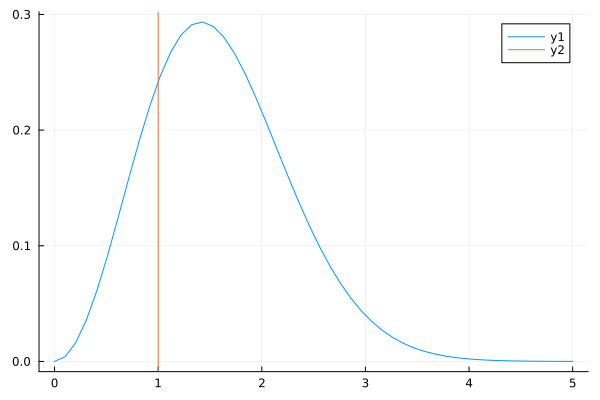

In [3]:

#problem
g(x) = x^2/sqrt(2*pi)*exp((-x^2)/2)
#積[1,Inf]
x = range(0,5,length=50) 
plot(x,g.(x))
vline!([1])


## Question1

### Direct Monte Carlo method (standard normal distribution as the sampling distribution.

$\theta \approx \hat\theta  = \sum_{x = 1}^{n} (\frac{1}{n})* g(X_i)\\ 
g(x) =  x^2*(x>1) \\
X_i \quad from \quad  Normal(0,1)$

In [4]:
g_q1(x) = x^2*(x>1)
function Direct_Monte_Carlo_method(g::Function, n=1000)
    sample = rand(Normal(0, 1),n)
 
    
    return mean(g.(sample))
end

Direct_Monte_Carlo_method (generic function with 2 methods)

In [5]:
function replicate_q1(r=100, n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Direct_Monte_Carlo_method(g_q1,n)
    end
    return mean(data), var(data), r, n 
end

replicate_q1 (generic function with 3 methods)

In [6]:
r1=replicate_q1(100)
print_mean_var(replicate_q1(100,100))
print_mean_var(r1)
print_mean_var(replicate_q1(100,10000))
print_mean_var(replicate_q1(100,10^5))

E(theta_hat):0.3863640857955318	 Var(theta_hat):0.013341870911862	 r:100; n:100
E(theta_hat):0.3962500284562534	 Var(theta_hat):0.0010136125259007	 r:100; n:1000
E(theta_hat):0.3998606652394206	 Var(theta_hat):0.0001204123158685	 r:100; n:10000
E(theta_hat):0.4012429936709672	 Var(theta_hat):1.31561020531e-5	 r:100; n:100000


$Var(\hat\theta)$的收斂速度為$O(\frac{1}{n})$

### method2

$\theta \approx \hat\theta  = \sum_{x = 1}^{n} (\frac{1}{n})* \frac{g(X_i)}{f(X_i)}\\ 
g(x) =\begin{cases} \frac{(x+1)^2}{\sqrt{2*\pi}}*exp(\frac{-(x+1)^2}{2}), if\quad x\ge 0\\\\
\frac{(-x+1)^2}{\sqrt{2*\pi}}*exp(\frac{-(-x+1)^2}{2}), otherwise  \end{cases}\\
f(x) = pdf\quad of \quad standard\quad normal\quad distribution\\
X_i \quad from \quad  Normal(0,1)$

求 E(g(x)); g(x) =  g_method2(x); standard normal distribution as the sampling distribution

In [7]:
function g_method2(x) #平移並旋轉對稱於y軸
    if x>=0 return (x+1)^2/sqrt(2*pi)*exp((-(x+1)^2)/2)
    else return (-x+1)^2/sqrt(2*pi)*exp((-(-x+1)^2)/2)
    end
end

f_q1(x) = pdf(Normal(0, 1),x)
function Direct_Monte_Carlo_method2(g::Function,important::Function,n=1000)
    sample = rand(Normal(0, 1),n)
    i(x) = g(x)/important(x)
    return mean(i.(sample))/2
end


Direct_Monte_Carlo_method2 (generic function with 2 methods)

In [8]:
function replicate_q1_method2(r=100,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Direct_Monte_Carlo_method2(g_method2,f_q1,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
# print_mean_var(replicate_q1_method2())
r1_method2=replicate_q1_method2()
print_mean_var(r1_method2)

E(theta_hat):0.4006631483360658	 Var(theta_hat):1.7893587312e-6	 r:100; n:1000


## Question2

2. Importance sampling method and the self-normalized importance sampling methods. Is there any difference between two methods? Which one is an unbiased estimator?

兩者不同的地方在於：  
Important sampling 是估計$\sum_{x = 1}^{n}(\frac{1}{n})g(x)* \frac{p(x)}{q(x)}$；  
Self-normalized importance sampling 是估計$\frac{\sum_{x = 1}^{n}(g(x)* \frac{p(x)}{q(x)})}{\sum_{x = 1}^{n}\frac{p(x)}{q(x)}}$   
故Important sampling 是 unbiased estimator。  
Using Tdist(5)  as important function.

In [9]:
x = range(-10,10, length=100)
p(x) = pdf(Normal(0,1),x)
q(x) = pdf(TDist(5),x)
#sample = rand(TDist(5),1000)
function Important_sampling(g::Function,p::Function, q::Function, n=1000)
    sample = rand(TDist(5),n)
    theta_hat(x) = g(x)*p(x)/q(x)
    return mean(theta_hat.(sample))
end

Important_sampling (generic function with 2 methods)

In [10]:
function replicate_q2(r=100,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Important_sampling(g_q1,p,q,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
# print_mean_var(replicate_q2())
r2=replicate_q2()
print_mean_var(r2)

E(theta_hat):0.3980592000550828	 Var(theta_hat):0.0008523084036309	 r:100; n:1000


In [11]:
function Self_norm_important_sampling(g::Function,p::Function, q::Function, n=1000)
    sample = rand(TDist(5),n)
    weight=p.(sample)./q.(sample)
    w=weight/sum(weight)
    return  sum(g.(sample).*w)
end

Self_norm_important_sampling (generic function with 2 methods)

In [12]:
function replicate_q2_snis(r=100,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Self_norm_important_sampling(g_q1,p,q,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
#print_mean_var(replicate_q2_snis())
r2_snis=replicate_q2_snis()
print_mean_var(r2_snis)

E(theta_hat):0.4020653865810556	 Var(theta_hat):0.0008811854601366	 r:100; n:1000


## Question3

3. Variable transformation of the integrand to a interval of [0; 1]

$
x = \frac{1}{t}\\  
|J| = \frac{1}{t^2}\\
g(t) = \frac{\frac{1}{t}^2}{\sqrt{2\pi}}*exp(\frac{-\frac{1}{t}^2}{2}) *\frac{1}{t^2}\\
\theta = \int_0^1  g(t) \,dt\\
\theta \approx \hat\theta  = \sum_{x = 1}^{n} (\frac{1}{n})* g(X_i)\\ 
X_i \quad from \quad  Unifrom(0,1)
$

In [13]:

x3(t) = 1/t
J(t) = -(t^(-2))
f_q3(t) = g(x3(t))*abs(J(t))
        
function Monte_Carlo_with_transfromation(g::Function,n=1000)
    sample = rand(Uniform(0, 1),n)
    return mean(g.(sample))
end


Monte_Carlo_with_transfromation (generic function with 2 methods)

In [14]:
    
function replicate_q3(r=100,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Monte_Carlo_with_transfromation(f_q3,n)
    end
    
    return mean(data),var(data),r,n
end
#print_mean_var(replicate_q3())
r3=replicate_q3()
print_mean_var(r3)
#print_mean_var(replicate_q3(100,10000))

E(theta_hat):0.4007733622199378	 Var(theta_hat):0.0001027566591747	 r:100; n:1000


## Question4

4. Two control variates.

$$u_i \sim Uniform(0,1)$$
first:$$f_1(u) = \frac{exp(-u) }{ (1 - exp(-1))} $$  
Second:$$f_2(u) = pdf Beta(3,2)$$
$$u_2=E_u(f_2(u)) = \int_0^1  f(u) \,du=1 $$

In [15]:


x3(t) = 1/t
J_q4(t) = -(t^(-2))
f(t) = g(x3(t))*abs(J_q4(t))
f1(u) = exp(-u) / (1 - exp(-1))
            
f2(u) = pdf(Beta(3,2),u)

f2 (generic function with 1 method)

In [16]:
function use_2_control_var(g::Function,f1::Function,f2::Function,n=1000)
    
    sample = rand(Uniform(0, 1),n)
    data = DataFrame(y = g.(sample), x1 = f1.(sample), x2=f2.(sample))
    linear_regression =  lm(@formula(y ~ x1 + x2), data)
    #print(linear_regression)
    c = -coef(linear_regression)[2:3]
    u =  [1 , 1]
    theta_hat = g.(sample)+ c[1]*(f1.(sample).-u[1]) + c[2]*(f2.(sample).-u[2]) 
    return mean(theta_hat)
end



use_2_control_var (generic function with 2 methods)

In [17]:
function replicate_q4(r=100,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Monte_Carlo_with_transfromation(f,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
#print_mean_var(replicate_q4())
r4=replicate_q4()
print_mean_var(r4)
#print_mean_var(replicate_q4(100,10000))

E(theta_hat):0.4037050303591856	 Var(theta_hat):0.0001069271832589	 r:100; n:1000


## Question5

5. Stratified Sampling (Divide the range of integration into n equal prob-
able segments). Discuss the effect of n.

In [18]:
function  Stratified_Monte_Carlo(g::Function,s=10,n=1000)
    ans = zeros(s)
    ans_var = zeros(s)
    w = 1/s
    stra = LinRange(0, 1, s+1)
    for i in range(1,s,step=1)
        N = Int(round(n/s))
        sample = rand(Uniform(stra[i], stra[i+1]),N)
        #print(mean(g.(sample)))
        ans[i] = mean(g.(sample))
        ans_var[i] = w^2 * var(g.(sample))/N
    end
    return sum(w*ans)
end


Stratified_Monte_Carlo (generic function with 3 methods)

In [19]:
function replicate_q5(r=100,x=10,n=1000)
    data = zeros(r)
    for i in 1:r
        data[i] = Stratified_Monte_Carlo(f,x,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
#print_mean_var(replicate_q5())
r5=replicate_q5()
print_mean_var(r5)
#print_mean_var(replicate_q5(100,10,10000))

E(theta_hat):0.400508223959674	 Var(theta_hat):2.8119450523e-6	 r:100; n:1000


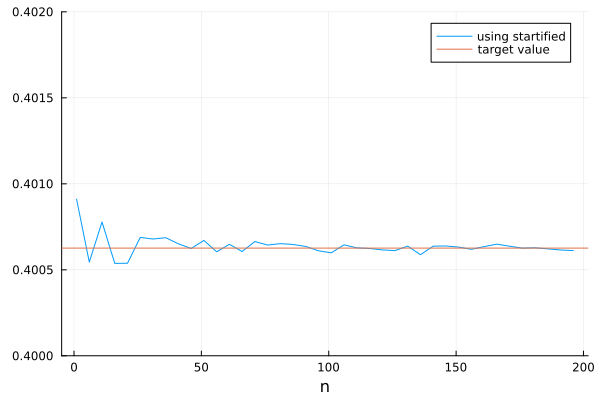

In [20]:
plot([x for x in 1:5:200],
[ replicate_q5(100,x)[1] for x in 1:5:200],
label="using startified")
hline!([quadgk(g, 1, Inf, rtol=1e-6)[1]],label="target value",ylim=[0.4,0.402])
xlabel!("n")

n越大，估的越準確。

## Question6

$$f_t(x) \sim Normal(t,1)$$

In [21]:
g6(x) = x^2/sqrt(2*pi)*exp((-x^2)/2)*(x>1)
m(t)=exp(0.5*t^2)
phi(x)=pdf(Normal(0,1),x)
ft(x,t = 1.5)=exp(t*x)*phi(x)/m(t)




function Q6_importance_function(x, t=0)
    m(t) = exp(0.5*t^2)
    phi(x) = pdf(Normal(0,1),x)
    ft(x, t)=exp(t*x)*phi(x)/m(t)
    return ft(x, t)
end
function Q6_Monte_Carlo(g::Function,important::Function, t, n=1000)
    sample = rand(Normal(t,1),n)
    i(x) = g(x)/important(x, t)
    return mean(i.(sample))
end
function replicate_q6(r=100,n=1000;t=0)
    data = zeros(r)
    for i in 1:r
        data[i] = Q6_Monte_Carlo.(g6,Q6_importance_function,t,n)
    end
    #filter!(data -> data != 0, data)
    return mean(data),var(data),r,n
end
  
r6=replicate_q6(t=1.6)
print_mean_var(r6) 
#print_mean_var(replicate_q6(100,10000,t=1.6)) 

E(theta_hat):0.4016638507326234	 Var(theta_hat):9.15818099532e-5	 r:100; n:1000


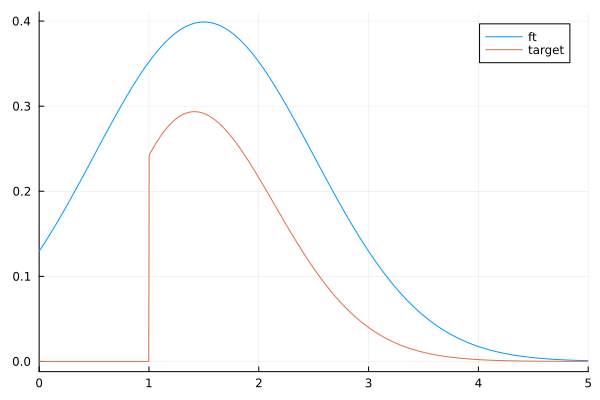

In [22]:


x = range(-20, 20, length=10000)
y=g6.(x)
z=ft.(x)
#w=pdf.(Normal(1.5,1),x)
plot(x, z,label="ft",xlim=[0,5])
plot!(x,y,label="target")
# plot!(x,w,label="Normal(0,t)")





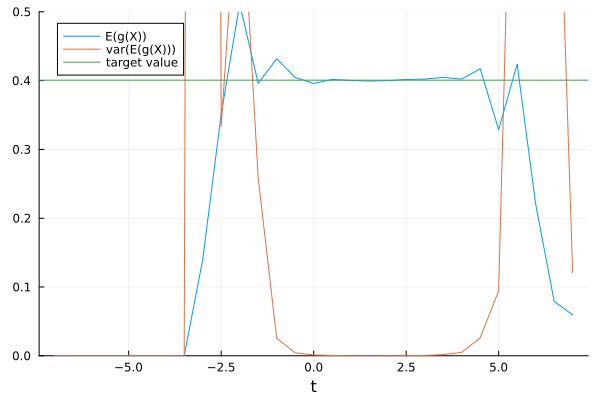

In [23]:

plot([i for i in -7:0.5:7], 
[replicate_q6(100,t=i)[1] for i in -7:0.5:7],label="E(g(X))")
plot!([i for i in -7:0.5:7], 
[replicate_q6(100,t=i)[2] for i in -7:0.5:7],label="var(E(g(X)))",
ylim=[0,0.5])
hline!([quadgk(g, 1, Inf, rtol=1e-6)[1]],label = "target value")
xlabel!("t")




當$f_t(x)$和$x^2*I_{(x>1)}*\phi(x)$越像，估的越好

empty -- for layout






# Summary
n=1000,重複100次(r=100)。

In [24]:
r=100
println("Direct monte carlo:\t\tE(theta_hat):",round(r1[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*r1[2], digits=16))
println("Direct monte carlo method2:\tE(theta_hat):",round(r1_method2[1], digits=16),"\t Var(theta_hat):",
round(((r)/(r-1))*r1_method2[2], digits=16))
println("Important sampling:\t\tE(theta_hat):",round(r2[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*r2[2], digits=16))
println("Self normal important sampling:\tE(theta_hat):",round(r2_snis[1], digits=16),"\t Var(theta_hat):",
round(((r)/(r-1))*r2_snis[2], digits=16))
println("Transformation:\t\t\tE(theta_hat):",round(r3[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*r3[2], digits=16))
println("Use 2 control variates:\t\tE(theta_hat):",round(r4[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*r4[2], digits=16))
println("Startified:\t\t\tE(theta_hat):",round(r5[1], digits=16),"\t Var(theta_hat):",round(((r)/(r-1))*r5[2], digits=16))
println("Use tile distribution & t=1.6:\tE(theta_hat):",round(r6[1], digits=16),"\t Var(theta_hat):",
round(((r)/(r-1))*r6[2], digits=16))

Direct monte carlo:		E(theta_hat):0.3962500284562534	 Var(theta_hat):0.0010136125259007
Direct monte carlo method2:	E(theta_hat):0.4006631483360658	 Var(theta_hat):1.7893587312e-6
Important sampling:		E(theta_hat):0.3980592000550828	 Var(theta_hat):0.0008523084036309
Self normal important sampling:	E(theta_hat):0.4020653865810556	 Var(theta_hat):0.0008811854601366
Transformation:			E(theta_hat):0.4007733622199378	 Var(theta_hat):0.0001027566591747
Use 2 control variates:		E(theta_hat):0.4037050303591856	 Var(theta_hat):0.0001069271832589
Startified:			E(theta_hat):0.400508223959674	 Var(theta_hat):2.8119450523e-6
Use tile distribution & t=1.6:	E(theta_hat):0.4016638507326234	 Var(theta_hat):9.15818099532e-5
